<a href="https://colab.research.google.com/github/juacostar/AlgorithmsUN2020II/blob/master/Pancakes/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio 8 Pancakes
* Juan Camilo Acosta Rojas

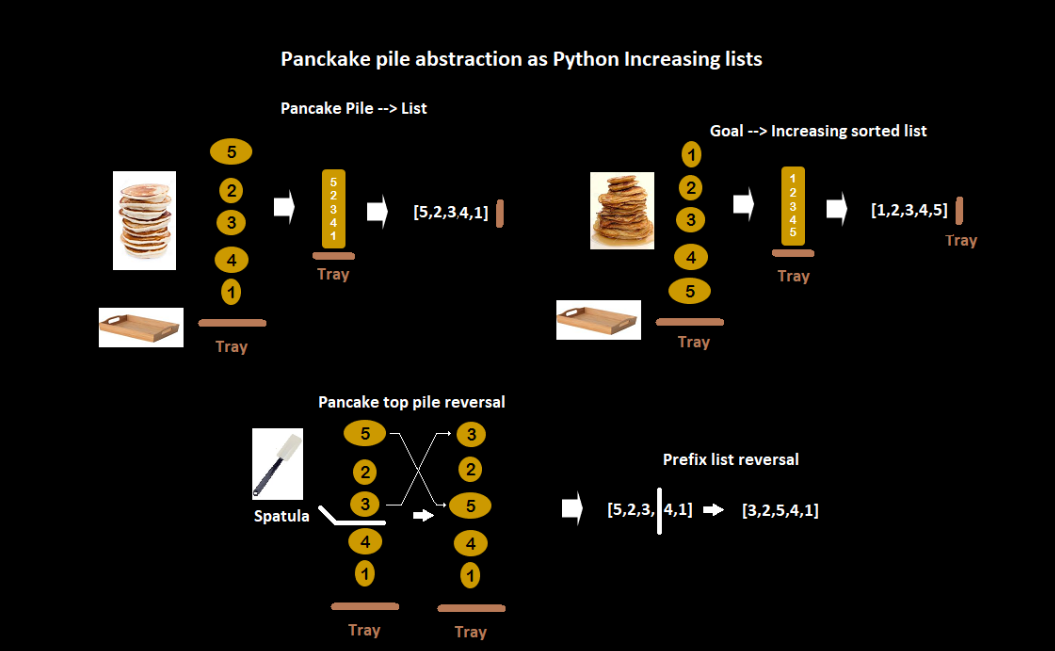

### Probando el algoritmo de Pancakes para distintos valores de $P_n$:

In [1]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [2]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [3]:
def pancake_network(p):
    # The number of pancakes as parameter
    s = list(range(1,p+1))
    print(s)
    # Create dictionaries graph,visited and pydot graph G
    graph = defaultdict()
    done = defaultdict()
    G = pydot.Dot(graph_type="graph")
    
    # Create a queue for BFS 
    queue = [] 

    # Mark the source node as visited and enqueue it 
    queue.append(s)

    while queue: 
        # Dequeue a vertex from queue 
        s = queue.pop(0) 
        graph[lstr(s)]=[]
        if(s != sorted(s)):
            node = pydot.Node(lstr(s))
        else:
            node = pydot.Node(lstr(s),style="filled", fillcolor="green") # first sorted green
        G.add_node(node)            
        
        visited = defaultdict()

        # Get all adjacent vertices of the 
        # dequeued vertex s. If a adjacent 
        # has not been visited, then mark it 
        # visited and enqueue it
        if not (lstr(s) in done):
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and lstr(d) not in visited.keys() and lstr(d) not in done.keys():   
                    if(d != sorted(d)):
                        node = pydot.Node(lstr(d))
                    else:
                        node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    queue.append(d) 
                    visited[lstr(d)] = True

        done[lstr(s)] = True
            
    # Dsplay the pydot graph G
    im = Image(G.create_png())
    display(im)

[1, 2, 3]


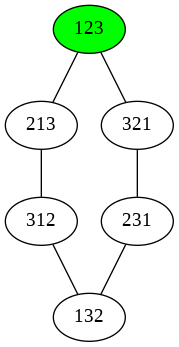

In [4]:
p = 3
pancake_network(p)

[1, 2, 3, 4]


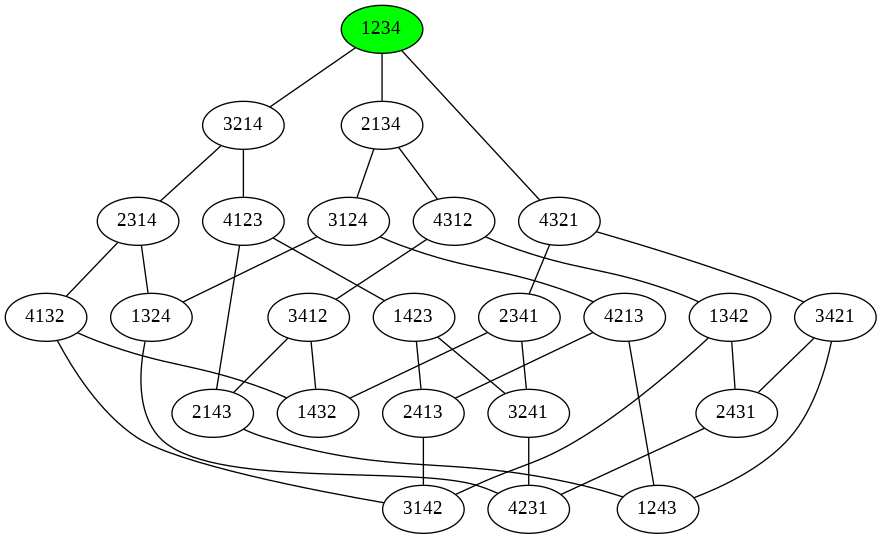

In [5]:
p = 4
pancake_network(p)

[1, 2, 3, 4, 5]


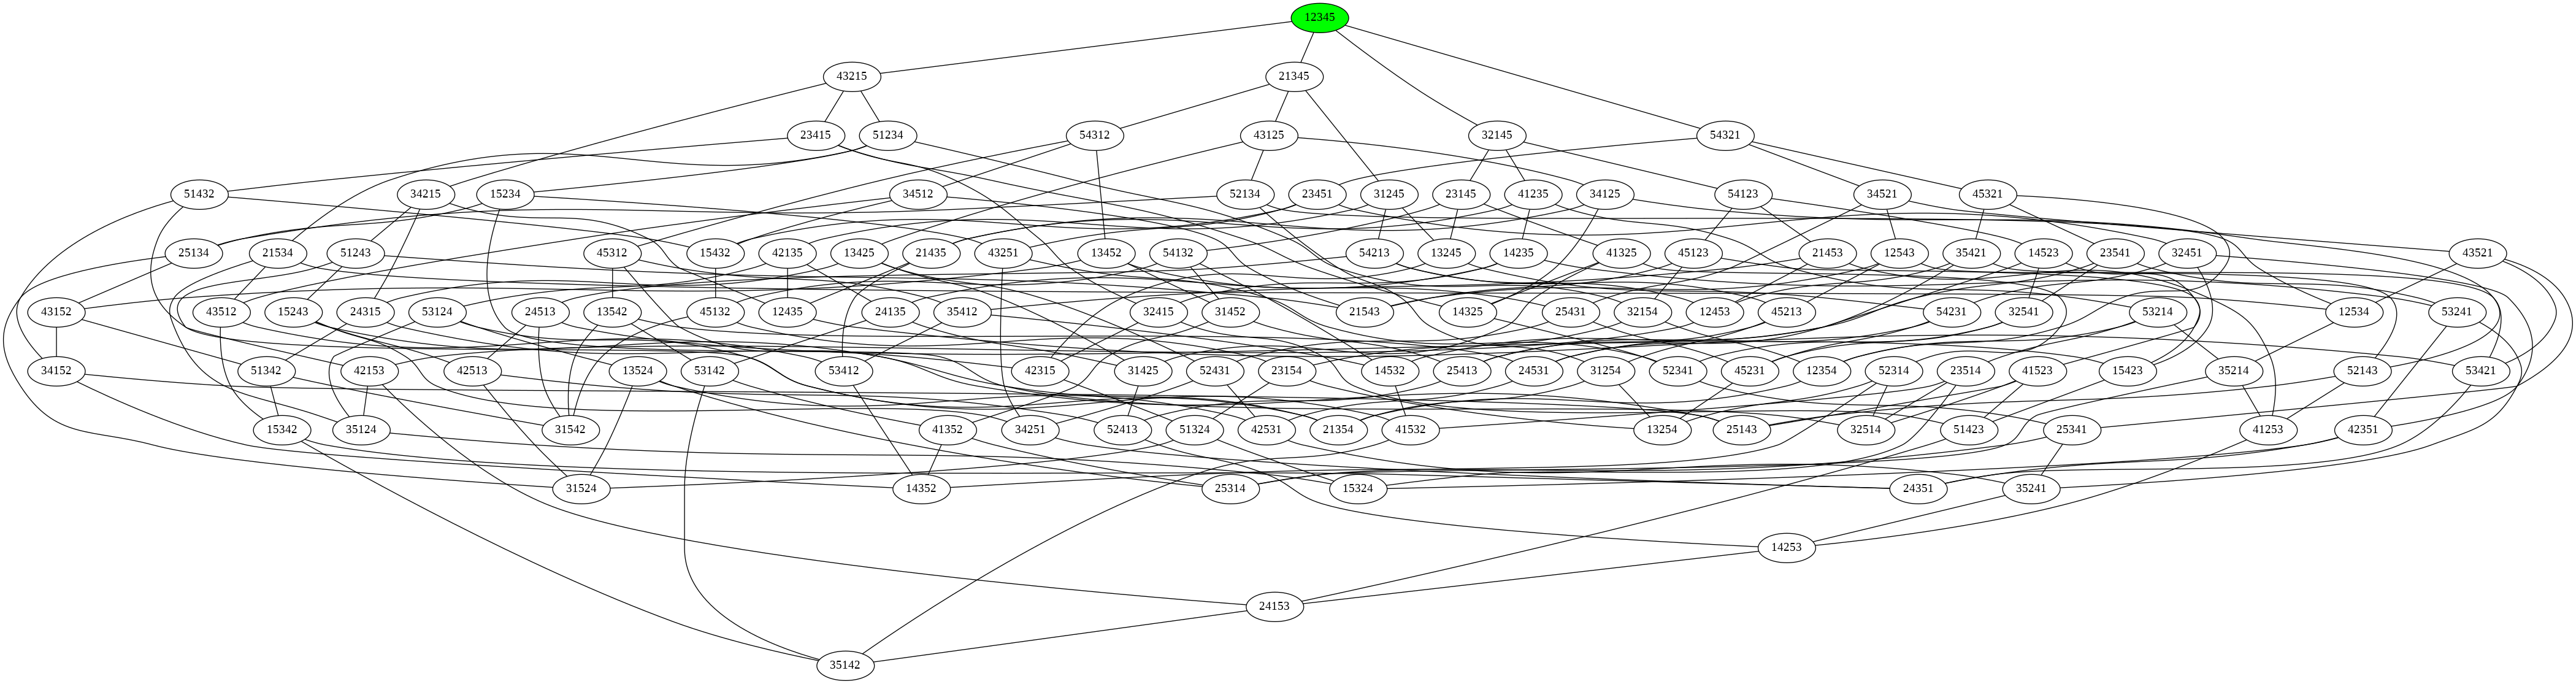

In [6]:
p = 5
pancake_network(p)

### Calculando el $P_n:$

In [7]:
# Funcion para obtener el Pn
def getPn(graph, s):
  # diccionario para los cálculos de Pn
  calcPn = defaultdict(int)
  visited = defaultdict()
  s = sorted(s)
  queue = []
  queue.append(s)
  calcPn[lstr(s)] = 0
  visited[lstr(s)] = True

  pn = 0
  while queue:
    s = queue.pop(0)
    for d in graph[lstr(s)]:
      if (d != s) and not(lstr(d) in visited.keys()):
        queue.append(d)
        calcPn[lstr(d)] = calcPn[lstr(s)] + 1
        visited[lstr(d)] = True
        if(calcPn[lstr(d)] > pn):
          pn = calcPn[lstr(d)]

  return pn
def Pn(r):
      file=open('resultados.txt','w')
      s=[]
      s = list(range(1, r+1))
      # Create dictionaries graph,visited and pydot graph G
      graph = defaultdict()
      visited = defaultdict()
        
      # Create a queue for BFS 
      queue = [] 
  
      # Mark the source node as visited and enqueue it 
      queue.append(s) 
      visited[lstr(s)] = True
  
      while queue: 
          # Dequeue a vertex from queue 
          s = queue.pop(0)
          graph[lstr(s)]=[]
            
          # Get all adjacent vertices of the 
          # dequeued vertex s. If a adjacent 
          # has not been visited, then mark it 
          # visited and enqueue it 
          for i in range(len(s)-1):
            d = s[i+1::-1] + s[i+2:]  
            if (d != s) and not(lstr(d) in visited.keys()):
              graph[lstr(s)].append(lstr(d))
              queue.append(d) 
              visited[lstr(d)] = True
              file.write("Pila se Pancakes: " + str(lstr(d)) + "\n")
      return (len(s), getPn(graph, s))
      file.close()

In [8]:
n = 6
print("n          Pn")
while n > 0:
  print(str(Pn(n)[0]) + "          " + str(Pn(n)[1]))
  n = n + 1

n          Pn
6          7
7          8
8          9
9          10
10          11


KeyboardInterrupt: ignored

### Pancakes Trees with two spatulas:

In [9]:
def TreeWith2Spatulas(s): 
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)):
                for j  in range(i+1,len(s)):
                  d = s[:i]+s[j::-1][0:j-i+1]+s[j+1:]
                  if (d != s) and not(lstr(d) in visited.keys()):
                    if(d != sorted(d)):
                      node = pydot.Node(lstr(d))
                    else:
                      node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    queue.append(d) 
                    visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

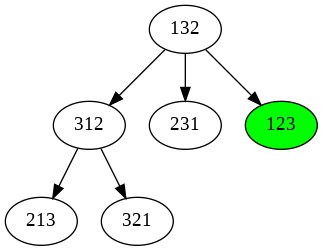

In [11]:
p = [1,3,2]
TreeWith2Spatulas(p)

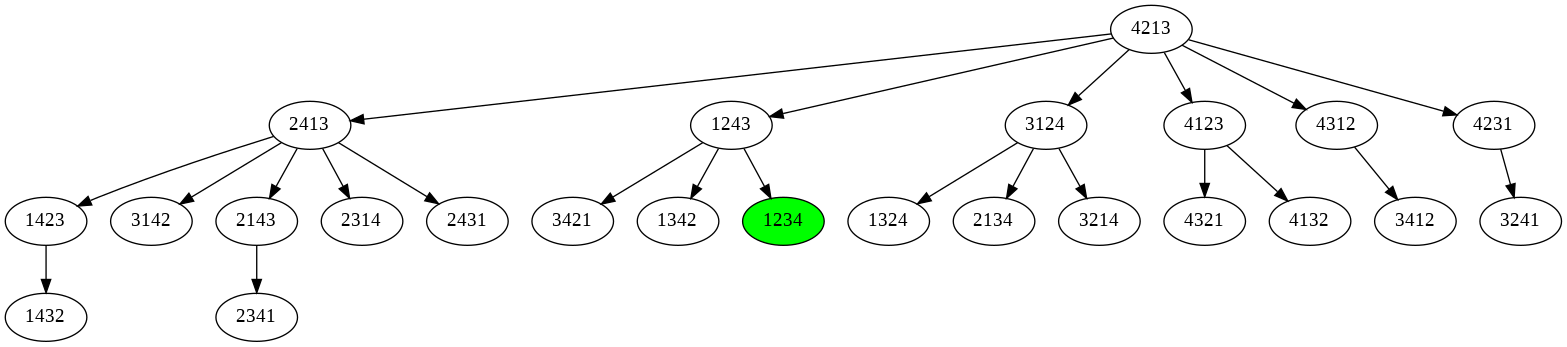

In [12]:
p = [4,2,1,3]
TreeWith2Spatulas(p)

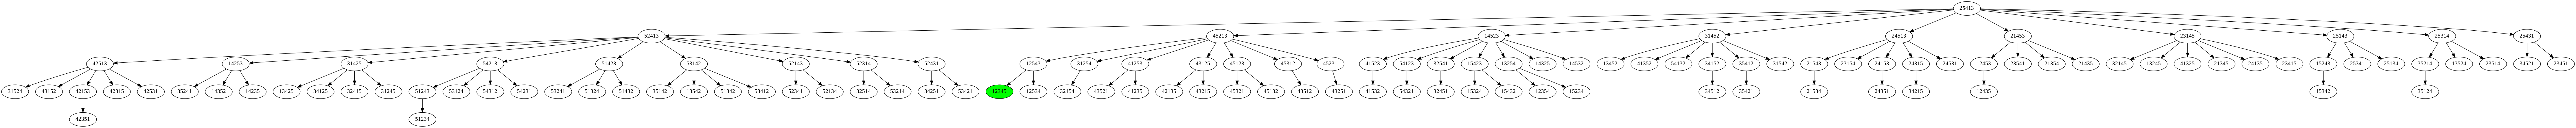

In [13]:
p = [2,5,4,1,3]
TreeWith2Spatulas(p)